## **EDA**

### Loading the Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "jupyterlab"


import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12,7)

# displaying all the columns
pd.set_option('display.max_columns', None)

### Loading the Dataset

In [15]:
df = pd.read_csv('../Dataset.csv')

In [16]:
country_code = pd.read_excel('../Country Code.xlsx')

In [17]:
# merging both the datasets 
df = pd.merge(df, country_code, on='Country Code',how='left')

In [18]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


### Understanding the data

In [19]:
# checking the shape of the data
print(f"Total number of rows: {df.shape[0]}")
print(f"Total number of columns: {df.shape[1]}")

Total number of rows: 9456
Total number of columns: 22


In [20]:
# Info of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9456 entries, 0 to 9455
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9456 non-null   int64  
 1   Restaurant Name       9456 non-null   object 
 2   Country Code          9456 non-null   int64  
 3   City                  9456 non-null   object 
 4   Address               9456 non-null   object 
 5   Locality              9456 non-null   object 
 6   Locality Verbose      9456 non-null   object 
 7   Longitude             9456 non-null   float64
 8   Latitude              9456 non-null   float64
 9   Cuisines              9447 non-null   object 
 10  Average Cost for two  9456 non-null   int64  
 11  Currency              9456 non-null   object 
 12  Has Table booking     9456 non-null   object 
 13  Has Online delivery   9456 non-null   object 
 14  Is delivering now     9456 non-null   object 
 15  Switch to order menu 

In [21]:
# checking for missing values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

There are 9 missing values in Cuisines column which is less than 0.5% thus, these can be removed.

In [22]:
df = df[~df['Cuisines'].isnull()]  # removing the missing values in Cuisines col

In [23]:
# Observing the descriptive statistics
df[['Average Cost for two','Price range','Aggregate rating','Votes']].describe()

,Average Cost for two,Price range,Aggregate rating,Votes
count,9447.00000,9447.000000,9447.000000,9447.000000
mean,1208.36583,1.809252,2.682809,158.197311
std,16209.43203,0.907323,1.505977,432.105448
min,0.00000,1.000000,0.000000,0.000000
25%,250.00000,1.000000,2.500000,5.000000
50%,400.00000,2.000000,3.200000,31.000000
75%,700.00000,2.000000,3.700000,132.000000
max,800000.00000,4.000000,4.900000,10934.000000


**Observations: -** 

**Average cost for two**
- The mean cost for two people is ₹1205, but the standard deviation (₹16,177) is very high, indicating significant variability in restaurant pricing.
- The minimum cost is ₹0, which might represent free items.
- The maximum cost is ₹800,000, which is likely an outlier.
- The median (₹400) suggests that most restaurants have a relatively lower price range than the mean, indicating the presence of high-cost outliers.
- The interquartile range (IQR) (₹250 to ₹700) shows that 50% of the restaurants fall within this price range.

**Price Range**
- The price range varies from 1 to 4, with most restaurants falling in categories 1 and 2.
- The mean price range is approx. 1.81, indicating that most restaurants are in the lower to mid-range pricing.
 
**Aggregate rating**
- The mean rating is approx. 2.67, which suggests that restaurants generally have average customer satisfaction.
- The minimum rating is 0, possibly due to new restaurants without reviews.
- The maximum rating is 4.9, showing that some restaurants are highly rated.
- The median rating is 3.2, meaning that half of the restaurants have a rating above this value.

**Votes**
- The mean number of votes is approx. 157, but the standard deviation (431) suggests high variation.
- The minimum votes are 0, which might indicate new or unrated restaurants.
- The maximum votes are 10,934, showing that some restaurants are extremely popular.
- The median number of votes is 31, indicating that most restaurants receive relatively few reviews.


### EDA

In [24]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

### Country having highest restaurants 

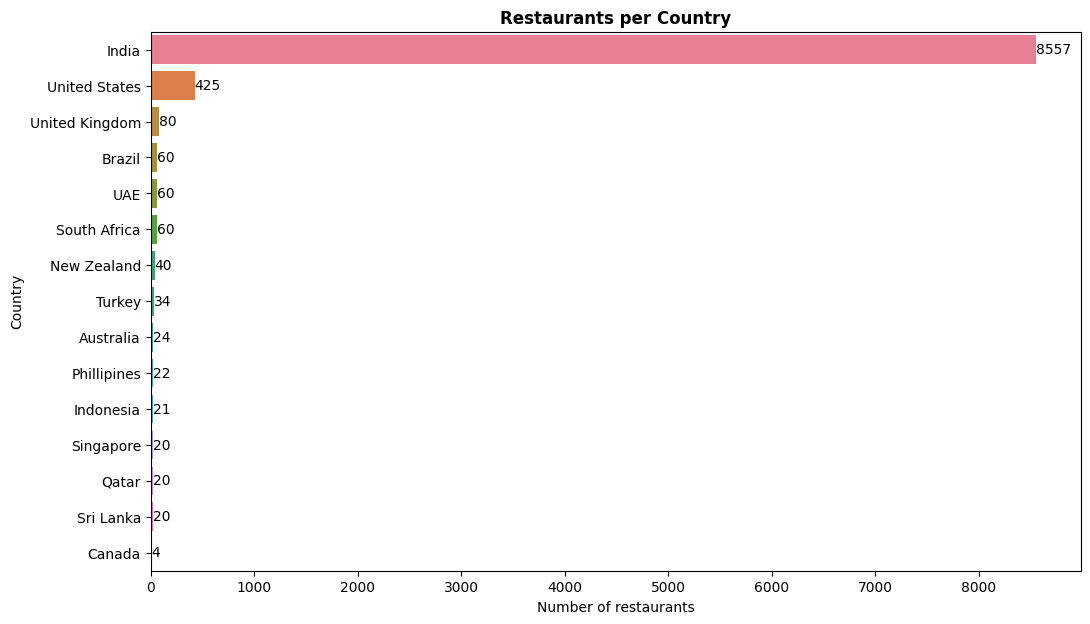

In [25]:
country_count = df['Country'].value_counts()

# Bar plot
ax = sns.barplot(y=country_count.index, x=country_count.values, palette='husl')

# adding labels
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Restaurants per Country', fontweight='bold')
plt.xlabel('Number of restaurants')
plt.ylabel('Country')
plt.show()

- The highest number of restaurants are recorded in India i.e., 8595.
- Except Unites States all other countries are having less than 100 restaurants recorded. 

### Countries having 0 rating

In [26]:
# Checking for the countries having 0 rating
not_rated_countries = df[df['Rating color'] == 'White'].groupby('Country').size().reset_index().rename(columns={0:'Rating count'})
not_rated_countries

,Country,Rating count
0,Brazil,5
1,India,2069
2,United Kingdom,1
3,United States,3


**Insights**

- India has the highest number of unrated restaurants (2100) suggesting a higher number of small or newly opened restaurants or the reason might be that Indians are still coming to the terms of online food ordering.
- Brazil (5), the United States (3), and the United Kingdom (1) have very few unrated restaurants, indicating either better engagement with reviews.

### Countries offering Online deliveries

In [27]:
online_delivery_country = df[df['Has Online delivery']=='Yes']['Country'].value_counts().reset_index()

# Visualization
fig = px.bar(online_delivery_country, x='Country',y='count',
             text_auto=True,
             color='Country',
             title='Countries offering online delivery of food')
fig.update_traces(textfont_size=18)

fig.show()

**Insights**

- Out of all the countries only India and UAE are the countries that are offering online deliveries.
- A total of 8595 restaurants in India, 2422 restaurants are having online delivery option which is approx 28% of all the restaurants in India.
- 28 restaurants in UAE offeres online delivery of food which is 46% of all the restaurants in UAE 

### Top Cites having highest number of restaurants

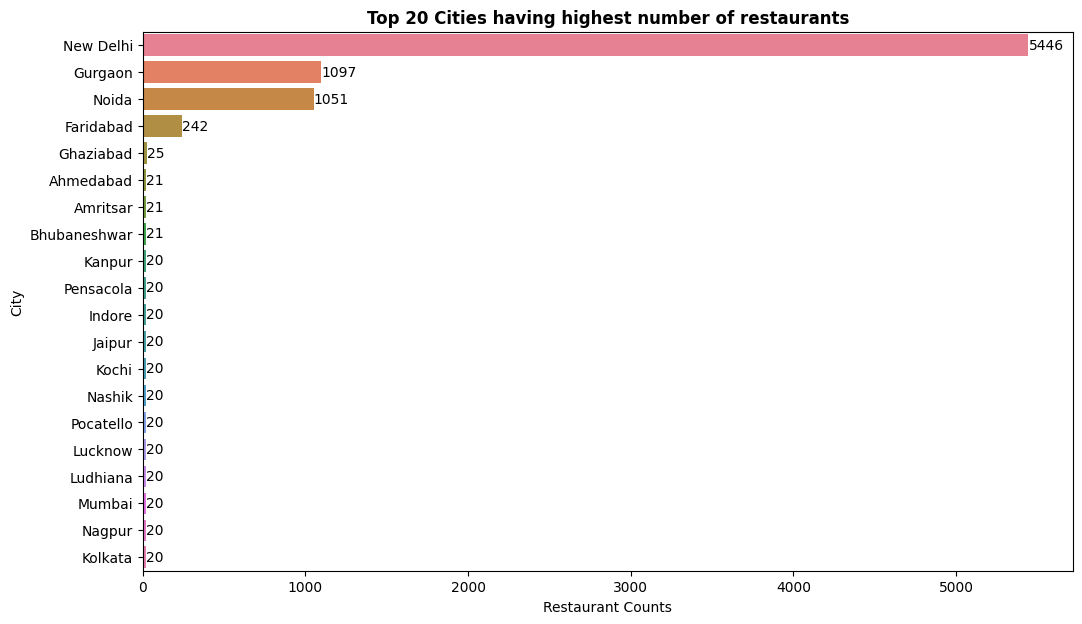

In [28]:
city_count = df['City'].value_counts().head(20)

# visualization
plt.figure(figsize=(12,7))
ax = sns.barplot(y=city_count.index, x=city_count.values, palette='husl')

for i in ax.containers:
    ax.bar_label(i,)
plt.title('Top 20 Cities having highest number of restaurants', fontweight='bold')
plt.xlabel('Restaurant Counts'); plt.ylabel('City')
plt.show()

**Insights**

- The above restaurants distribution among various cities shows that New Delhi has the highest number of restaurants (5473) followed by Gurgaon (1102) and Noida (1055). 
- The other cities mentioned in the data are having restaurants less than 25, except for Ghaziabad which has 25 restaurants.

### Rating Distribution

In [29]:
rating = df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0: 'Rating count'})
rating

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2078
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


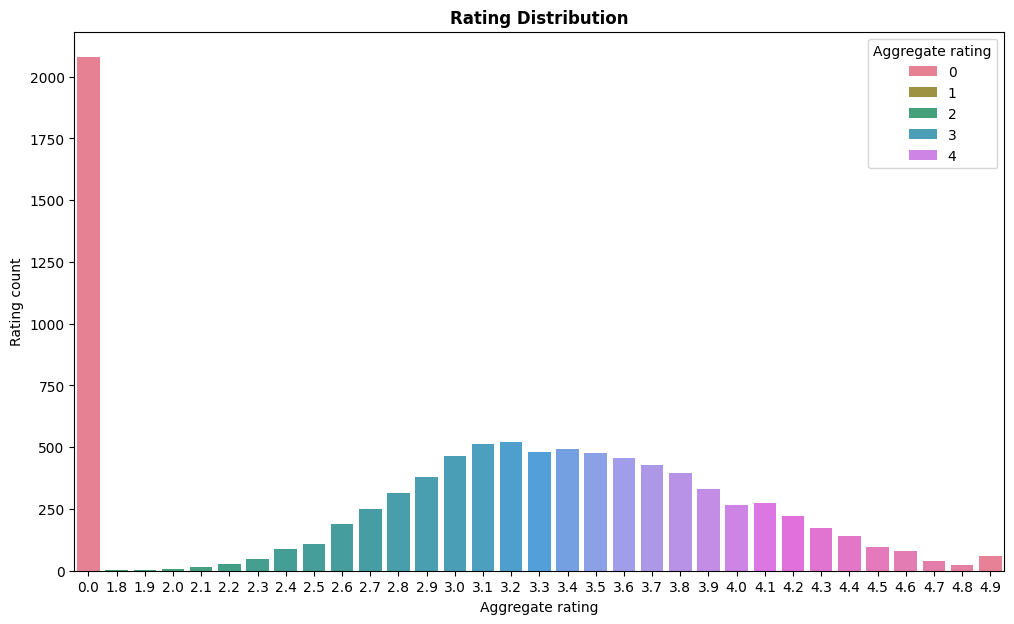

In [30]:
sns.barplot(data=rating, x='Aggregate rating', y='Rating count',hue='Aggregate rating', palette='husl')
plt.title('Rating Distribution', fontweight='bold')
plt.show()

### Rating Distribution 

In [31]:
# rating text Distribution
rating_text_distribution = df.groupby(['Rating text','Rating color']).size().reset_index().rename(columns={0:'Rating count'})
rating_text_distribution

,Rating text,Rating color,Rating count
0,Average,Orange,3722
1,Excellent,Dark Green,300
2,Good,Yellow,2086
3,Not rated,White,2078
4,Poor,Red,186
5,Very Good,Green,1075


In [32]:
fig = px.pie(rating_text_distribution, values='Rating count', names='Rating text',
             title='Rating Text Distribution',
             color_discrete_sequence=['orange','white',
                                      'yellow','lightgreen','darkgreen',
                                      'red'])
fig.update_traces(textinfo='label+percent', hoverinfo='value',
                  marker=dict(line=dict(color='black',width=0.8)))
fig.show()

**Insights**

- Most restaurants have an "Average" rating (39.3%) suggesting that while restaurants meet basic expectations, they don’t necessarily stand out in terms of service, food quality, or ambiance.
- A significant portion of restaurants (22.2%) are "Not Rated". This could indicate newer restaurants, low customer engagement, or a lack of sufficient reviews.
- Restaurants with "Good" (22%) and "Very Good" (11.3%) ratings are common. About one-third of restaurants perform above average, indicating decent food and service.
- Only a small percentage (3.16%) achieve "Excellent" ratings indicating that truly exceptional restaurants are rare, possibly due to high customer expectations or inconsistent quality.
- Very few restaurants (1.96%) have a "Poor" rating.
- Most restaurants are neither exceptionally great nor terrible, with the majority falling into "Average" or "Good" categories.

### Rating distribution among restaurants having online delivery option

In [33]:
temp_df = df.groupby(['Rating text','Has Online delivery']).size().reset_index().rename(columns={0:'count'})
fig = px.bar(temp_df, x='Rating text',y='count',color='Has Online delivery',
             barmode='group', text_auto=True,
             title='Rating of Restaurants having Online and Offline Food Delivery')


fig.show()

**Insights**

- Restaurants without online delivery (2621) have significantly more "Average" ratings than those with online delivery (1105). This suggests that traditional dine-in restaurants may be more common and tend to receive neutral feedback.
- Restaurants without online delivery dominate the "Not Rated" category (2013 vs. 96). This indicates that many offline-only restaurants lack customer reviews, possibly because they are less active in digital platforms or have fewer customers leaving feedback.
- Offline restaurants: 1272 "Good" and 798 "Very Good" ratings. Online restaurants: 817 "Good" and 277 "Very Good" ratings. This suggests that offline restaurants might provide a better in-person experience, leading to more favorable reviews.
- "Poor" ratings are slightly more common for online restaurants suggesting that customers might be more critical of food delivery experiences due to delays, packaging issues, or quality inconsistencies.

In [34]:
# Count of Excellent Rating Restaurants offering online deliveries per country

excellent_rating_countries = df[df['Rating text'] == 'Excellent']
temp_df = excellent_rating_countries[excellent_rating_countries['Has Online delivery'] == 'No'].groupby('Country').size().reset_index().rename(columns={0:'count'})
temp_df = temp_df.sort_values(by='count',ascending=False)
fig = px.bar(temp_df, x='Country', y='count', text_auto=True,color_discrete_sequence=['violet'],
             title='Countries having restaurants with excellent rating and are not offering online deliveries')
fig.show()

**Insights**

- India has the highest number of restaurants with excellent ratings that do not offer online deliveries (80), followed by the United States (67).
- There is a sharp decline after the top two countries. The United Kingdom is third but has only 23 restaurants, much lower than the top two.
- Countries like Qatar (4), Sri Lanka (2), and Australia (1) have very few restaurants in this category.

In [35]:
temp_df1 = excellent_rating_countries[excellent_rating_countries['Has Online delivery'] == 'No']

temp_df1 = temp_df1[temp_df1['Country'].isin(['India'])]

temp_df1['scaled_votes'] = temp_df1['Votes']*20

# Assuming 'size_column' is a numerical column for the size of the markers.
fig = px.scatter_mapbox(temp_df1,
                        lat='Latitude',
                        lon='Longitude',
                        color='Locality',
                        size='scaled_votes',
                        color_discrete_sequence=px.colors.cyclical.IceFire,
                        size_max=30,
                        zoom=10,
                        title='Indian Restaurants not offering online food delivery but have excellent rating')

fig.update_layout(mapbox_style="carto-positron", width=1000, height=800)
fig.show()

### Cuisines Varity 

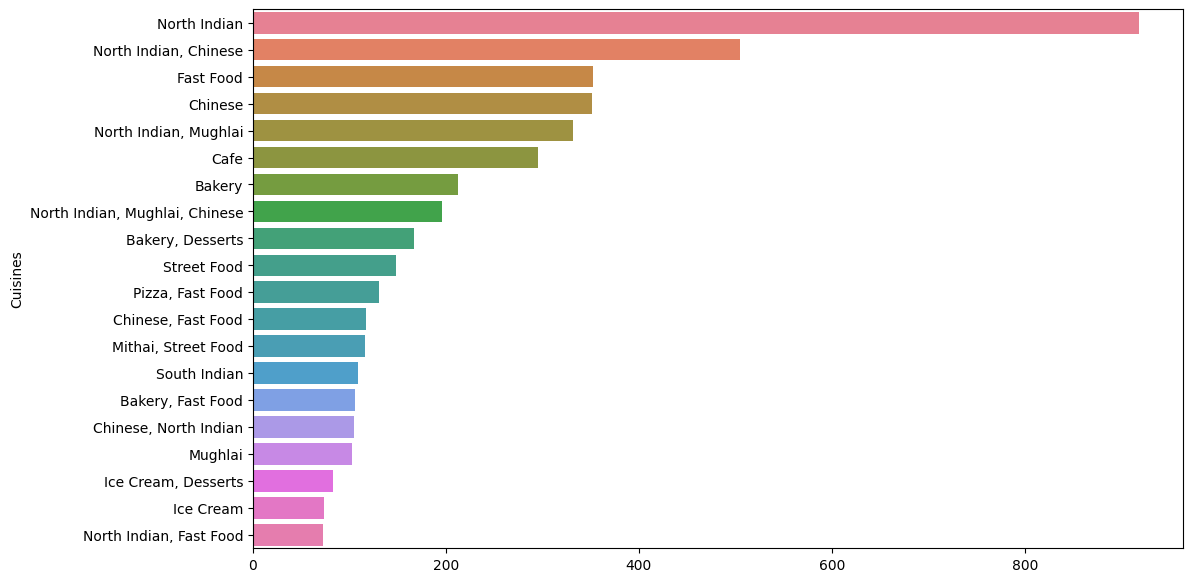

In [36]:
cuisine_type = df['Cuisines'].value_counts().head(20)

sns.barplot(x=cuisine_type.values, y=cuisine_type.index, palette='husl')

plt.show()

This shows that North Indian cuisines are more available in restaurants as most of the restaurants are in India.

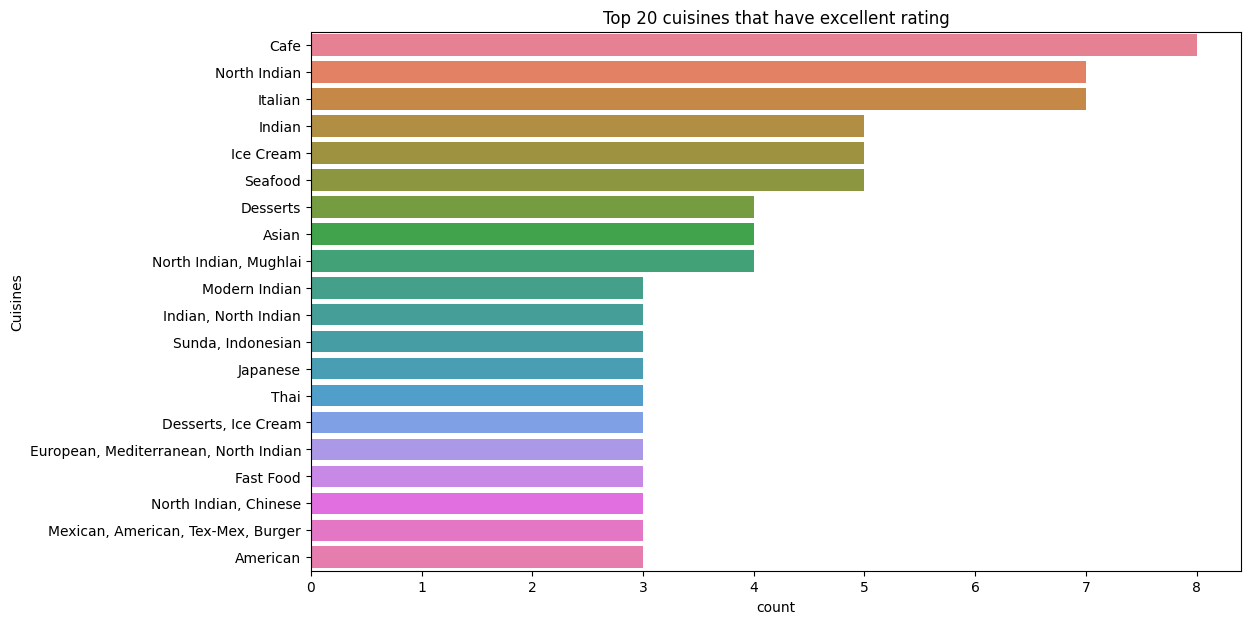

In [37]:
excellent_cuisines = df[df['Rating text']=='Excellent']['Cuisines'].value_counts().reset_index().head(20)

# Visualization
sns.barplot(data=excellent_cuisines, y='Cuisines',x='count',hue='Cuisines', palette='husl')
plt.title('Top 20 cuisines that have excellent rating')
plt.show()

- Cafe is the most highly rated cuisine. North Indian and Italian cuisines high counts, indicating strong customer preference. 
- Fusion cuisines appear frequently; Categories like "Mexican, American, Tex-Mex, Burger" and "European, Mediterranean, North Indian" indicate a preference for diverse flavors.
- Seafood is among the higher-ranked cuisines, showing a preference for fresh seafood.


In [38]:
top_5_cities = df[(df['Country'] =='India')&(df['City'].isin(['New Delhi','Gurgaon',
                                                                       'Noida','Faridabad','Ghaziabad','Guwahati',
                                                                       'Lucknow','Bhubaneshwar','Ahmedabad','Amritsar']))]
# hover_data=["Aggregate rating","Restaurant Name","Average Cost for two","Price range", 'Rating text']

fig = px.scatter_mapbox(top_5_cities, lat='Latitude',lon='Longitude',
                        color='Locality Verbose',
                        size='Votes',
                        color_discrete_sequence=px.colors.cyclical.IceFire,
                        size_max=30,
                        zoom=10,
                        title='Top 5 Indian Cities having highest number of Restaurants')

fig.update_layout(mapbox_style="carto-positron", width=1000, height=800)
fig.show()

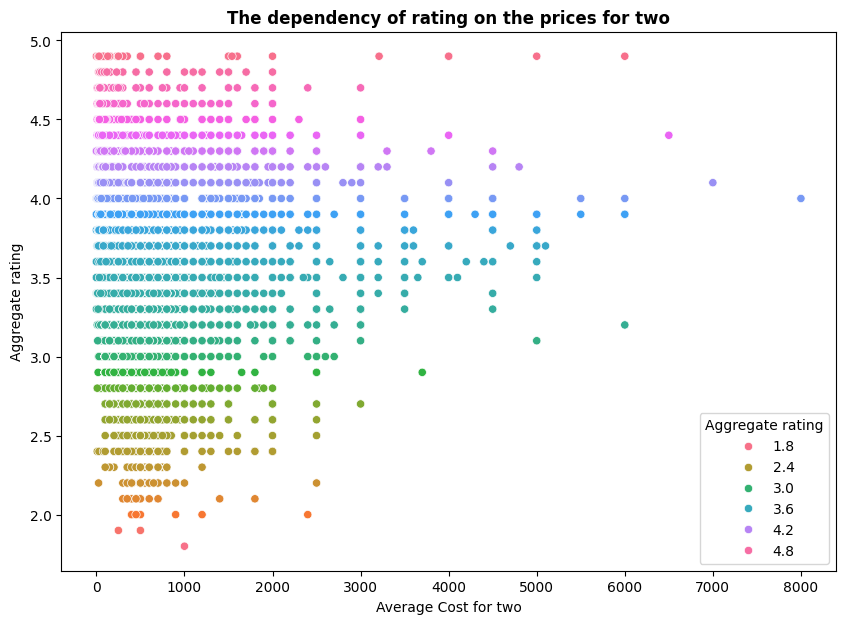

In [39]:
temp_df = df[(df['Average Cost for two']<10000)&(df['Aggregate rating'] != 0)]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=temp_df, x='Average Cost for two',
                y='Aggregate rating',hue='Aggregate rating',
                palette='husl')
plt.title("The dependency of rating on the prices for two", fontweight='bold')
plt.show()

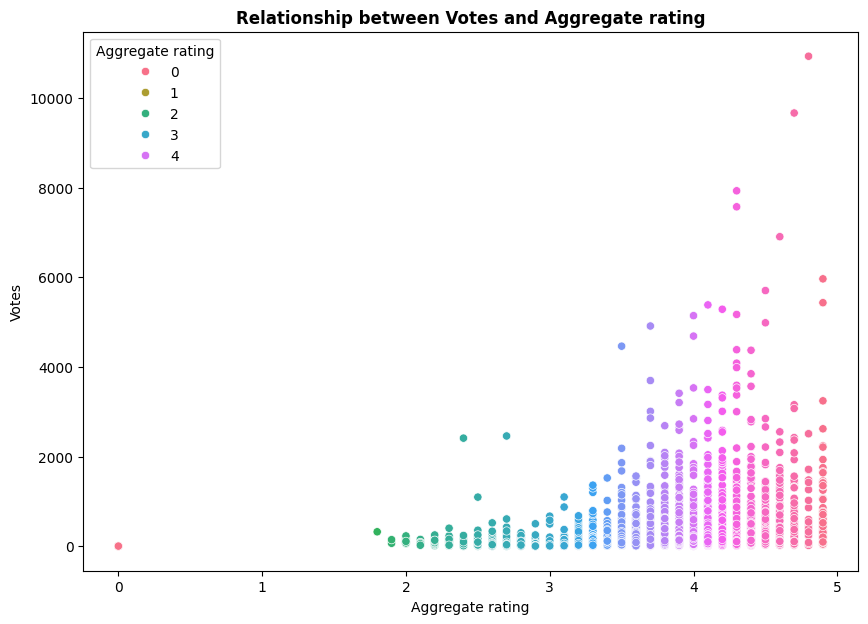

In [40]:
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Aggregate rating',y='Votes',hue='Aggregate rating', palette='husl')
plt.title('Relationship between Votes and Aggregate rating',fontweight='bold')
plt.show()

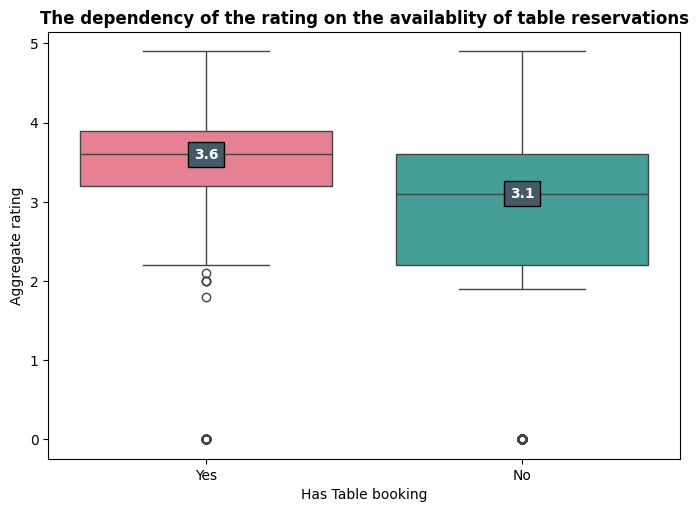

In [41]:
plt.figure(figsize=(7,5))
box_plot = sns.boxplot(data=df, x='Has Table booking',y='Aggregate rating', hue='Has Table booking', palette='husl')

# printing the median in the boxplot
ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

plt.title('The dependency of the rating on the availablity of table reservations', fontweight='bold')
plt.show()

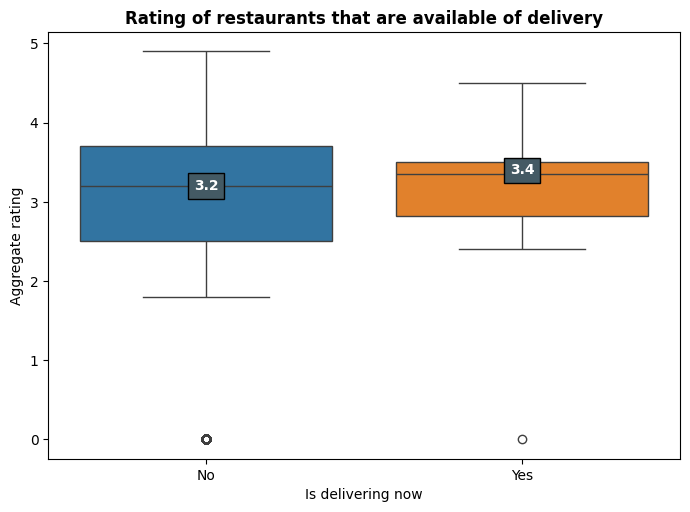

In [42]:
# Checking the relation between rating and availabilty of delivery

plt.figure(figsize=(7,5))
box_plot = sns.boxplot(data=df, x='Is delivering now',y='Aggregate rating', hue='Is delivering now')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()
plt.title('Rating of restaurants that are available of delivery', fontweight='bold')

plt.show()

In [43]:
# Filtering the data for city New Delhi
delhi = df[df['City']=='New Delhi']

# Creating the bar chart
fig = go.Figure(data=[go.Bar(
    x=delhi['Locality'].value_counts().head(10).index,
    y= delhi['Locality'].value_counts().head(10),
    marker=dict(color='violet'),
    text=delhi['Locality'].value_counts().head(10),
    textposition='auto'
)])

# Adding the tilte, xlabel and ylabel to the chart
fig.update_layout(title='Top 10 localities in New Delhi',
                  xaxis_title='Locality',
                  yaxis_title='Frequency',
                  title_x=0.5  # Center the title
                  )  
fig.show()

In [44]:
# Top 0 cuisines of New Delhi

cuisine_value = delhi['Cuisines'].value_counts()
cuisine_label = delhi['Cuisines'].value_counts().index

fig = go.Figure(data=go.Pie(
    labels=cuisine_label[:10], values=cuisine_value[:10],
    textinfo='label+percent', insidetextorientation='radial'
))

fig.update_layout(
    title={'text':'Top 10 Cuisines available in New Delhi',
           'y':0.95,    # movig the title up
           'x':0.5,     # Center title
           'xanchor':'center',
           'yanchor':'top'},
           uniformtext_minsize=12,   # setting minimum font size for labels
           margin=dict(t=90, b=80, l=50, r=90)   #adjusting margins
)

fig.update_traces(
    textposition='inside',  # Positions the text inside the pie slices
    insidetextorientation='radial'  # Or 'horizontal' to prevent text overlap
)

fig.show()

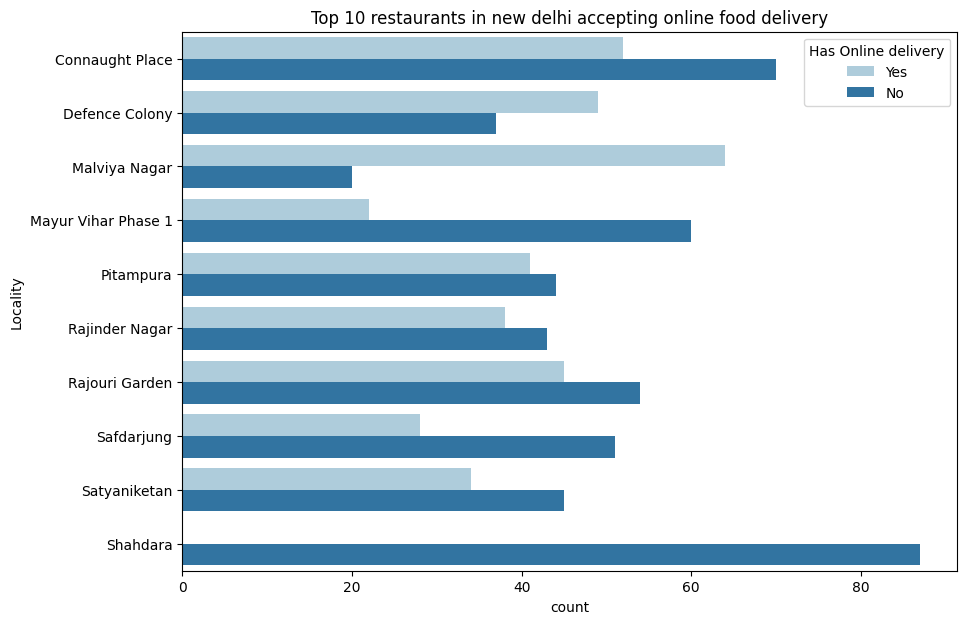

In [45]:
# Restaurants accepting online deliveries in New delhi

top_locality = delhi['Locality'].value_counts().head(10)

plt.figure(figsize=(10, 7))
sns.countplot(data=delhi[delhi['Locality'].isin(top_locality.index)], y='Locality', 
              hue='Has Online delivery', palette='Paired')
plt.title('Top 10 restaurants in new delhi accepting online food delivery')

plt.show()

In [46]:
# Which is the highest rated restaurant in New Delhi

# Creating the bar chart
fig = go.Figure(data=[go.Bar(
    x=delhi['Restaurant Name'].value_counts(ascending=False).head(10).index,
    y= delhi['Restaurant Name'].value_counts(ascending=False).head(10),
    marker=dict(color='seagreen'),
    text=delhi['Restaurant Name'].value_counts(ascending=False).head(10),
    textposition='auto'
)])

# Adding the tilte, xlabel and ylabel to the chart
fig.update_layout(title='Highest Rated Restaurants in New Delhi',
                  xaxis_title='Locality',
                  yaxis_title='Frequency',
                  title_x=0.5  # Center the title
                  )  
fig.show()

**Insights**

- Cafe Coffee Day has the highest frequency (57), followed closely by Domino’s Pizza (55). Subway (38) and Green Chick Chop (37) rank next.
- McDonald's (33) is slightly lower than Green Chick Chop.
- Giani’s (17) has a significantly lower count. Aggarwal Sweets and Wah Ji Wah have the lowest frequency (14 each).
- Fast-food chains like Cafe Coffee Day, Domino’s, Subway, and McDonald's dominate. Local specialty restaurants (Green Chick Chop, Giani, Keventers) still hold a strong presence but at lower frequencies.

In [47]:
# Location of the highest rated restaurants in New Delhi

highest_rating = delhi[delhi['Rating text']=='Excellent']

fig = px.scatter_mapbox(highest_rating, lat='Latitude',
                        lon='Longitude',
                        hover_name='City',
                        hover_data=['Restaurant Name','Aggregate rating'],
                        color='Locality Verbose',
                        size='Votes',
                        color_discrete_sequence=px.colors.cyclical.IceFire,
                        size_max=30,
                        zoom=10)

fig.update_layout(mapbox_style="carto-positron", 
                  title='Highest rated restaurant in New Delhi',
                  autosize=True,
                  hovermode='closest',
                  showlegend=False, width=1000, height=800)

fig.show()